### [작업 1]
한글을 사용할 수 있도록 차트를 준비

Text(0.5, 1.0, '가나다')

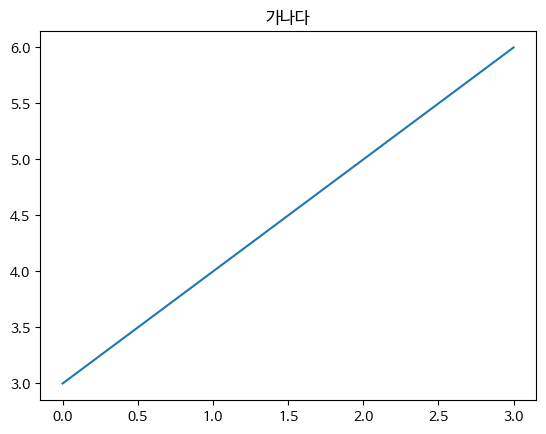

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='NanumBarunGothic'

plt.plot([3,4,5,6])
plt.title('가나다')


### [작업 2]
구글 검색 '한글 인코딩'

### [작업 3]
csv 자료 읽기
encoding
- euc-kr
  - EUC-KR은 초기에 UNIX 운영체제에서 한글을 표현하기 위해 개발
- cp949
  - 마이크로소프트에서 개발한 문자 인코딩 방식으로, EUC-KR의 확장형
- utf-8
  - 유니코드를 위한 가변 길이 문자 인코딩 방식

차이점
- EUC-KR과 CP949는 주로 한글을 사용하는 환경에서, UTF-8은 국제화 및 다국어 지원이 필요한 환경에서 사용

In [2]:
## csv 자료를 list 자료로 읽기

import csv

data = []
f = open('울산광역시 남구_코로나19_확진자_및_사망자_현황_20220126.csv', 'r', encoding='euc-kr')
reader = csv.reader(f)
for row in reader:
    data.append(row)

f.close()

In [3]:
data

[['시도', '시군구', '발생년도', '발생월', '확진자수', '사망자수', '데이터 기준일자'],
 ['울산광역시', '남구', '2020', '02', '8', '0', '2022-01-26'],
 ['울산광역시', '남구', '2020', '03', '9', '1', '2022-01-26'],
 ['울산광역시', '남구', '2020', '04', '1', '0', '2022-01-26'],
 ['울산광역시', '남구', '2020', '07', '2', '0', '2022-01-26'],
 ['울산광역시', '남구', '2020', '08', '18', '0', '2022-01-26'],
 ['울산광역시', '남구', '2020', '09', '20', '0', '2022-01-26'],
 ['울산광역시', '남구', '2020', '10', '2', '0', '2022-01-26'],
 ['울산광역시', '남구', '2020', '11', '9', '0', '2022-01-26'],
 ['울산광역시', '남구', '2020', '12', '292', '22', '2022-01-26'],
 ['울산광역시', '남구', '2021', '01', '28', '8', '2022-01-26'],
 ['울산광역시', '남구', '2021', '02', '11', '1', '2022-01-26'],
 ['울산광역시', '남구', '2021', '03', '18', '0', '2022-01-26'],
 ['울산광역시', '남구', '2021', '04', '259', '0', '2022-01-26'],
 ['울산광역시', '남구', '2021', '05', '255', '1', '2022-01-26'],
 ['울산광역시', '남구', '2021', '06', '58', '0', '2022-01-26'],
 ['울산광역시', '남구', '2021', '07', '121', '0', '2022-01-26'],
 ['울산광역시', '남구', '2021', '08',

### [작업 4]
자료 분리
- label : 발생날짜
- num : 확진자 수, 사망자 수

In [4]:
# 자료 분리

header = data[0]; local = data[1:]
label = []
for x in local:
    label.append(x[2]+'-'+x[3])

num = []
for x in local:
    num.append(x[4:6])


In [5]:
label  # 발생날짜

['2020-02',
 '2020-03',
 '2020-04',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12',
 '2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07',
 '2021-08',
 '2021-09',
 '2021-10',
 '2021-11',
 '2021-12',
 '2022-01']

In [6]:
num  # num[0] = 확진자수, num[1] = 사망자수

[['8', '0'],
 ['9', '1'],
 ['1', '0'],
 ['2', '0'],
 ['18', '0'],
 ['20', '0'],
 ['2', '0'],
 ['9', '0'],
 ['292', '22'],
 ['28', '8'],
 ['11', '1'],
 ['18', '0'],
 ['259', '0'],
 ['255', '1'],
 ['58', '0'],
 ['121', '0'],
 ['292', '0'],
 ['316', '5'],
 ['87', '0'],
 ['91', '1'],
 ['299', '1'],
 ['327', '2']]

### [작업 5]
num의 확진자 수와 사망자 수가 문자로 되어 있어서 숫자로 변경

In [7]:
# num의 확진자 수와 사망자 수가 문자로 되어 있어서 숫자로 변경

# new_num = []
# for x in num:
#     line = []

#     for y in x:
#         line.append(int(y))
#     new_num.append(line)

new_num = [list(map(int, x)) for x in num]

new_num

[[8, 0],
 [9, 1],
 [1, 0],
 [2, 0],
 [18, 0],
 [20, 0],
 [2, 0],
 [9, 0],
 [292, 22],
 [28, 8],
 [11, 1],
 [18, 0],
 [259, 0],
 [255, 1],
 [58, 0],
 [121, 0],
 [292, 0],
 [316, 5],
 [87, 0],
 [91, 1],
 [299, 1],
 [327, 2]]

### [작업 6]

차트 작업에 필요한 숫자 계산 후 차트 그리기

In [8]:
import numpy as np
세로합 = np.sum(new_num, axis = 0)  # 0번째 : 확진자 수의 합, 1번째 : 사망자 수 합
세로합

array([2523,   42])

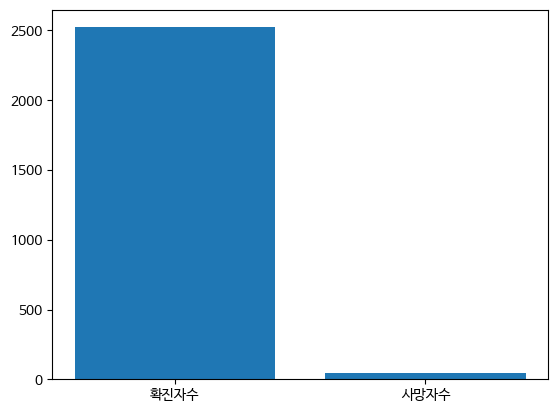

In [9]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumBarunGothic')

plt.bar(header[4:6], 세로합)  # header[4] = 확진자수, header[5] = 사망자수
plt.show()

### 조건문 추가
2020년과 2021년 자료를 분리

In [10]:
num_2020 = []
num_2021 = []

for val_x, val_y in zip(local, new_num):
    if '2020' in val_x:
        num_2020.append(val_y)
    elif '2021' in val_x:
        num_2021.append(val_y)

In [11]:
num_2020  # 2020년도 각 월에 따른 확진자수와 사망자수

[[8, 0], [9, 1], [1, 0], [2, 0], [18, 0], [20, 0], [2, 0], [9, 0], [292, 22]]

In [12]:
num_2021  # 2021년도 각 월에 따른 확진자수와 사망자수

[[28, 8],
 [11, 1],
 [18, 0],
 [259, 0],
 [255, 1],
 [58, 0],
 [121, 0],
 [292, 0],
 [316, 5],
 [87, 0],
 [91, 1],
 [299, 1]]

### [작업 7]
- 차트 작업에 필요한 합계를 추출
- 2020년, 2021년 자료를 분리해서 보고자 함.
- axis = 0은 열(세로) 단위로 연산.

In [13]:
# 차트 작업
세로합_2020년도 = np.sum(num_2020, axis = 0)
세로합_2021년도 = np.sum(num_2021, axis = 0)

print(세로합_2020년도)
print(세로합_2021년도)

[361  23]
[1835   17]


### [작업 8]
- 차트 작업

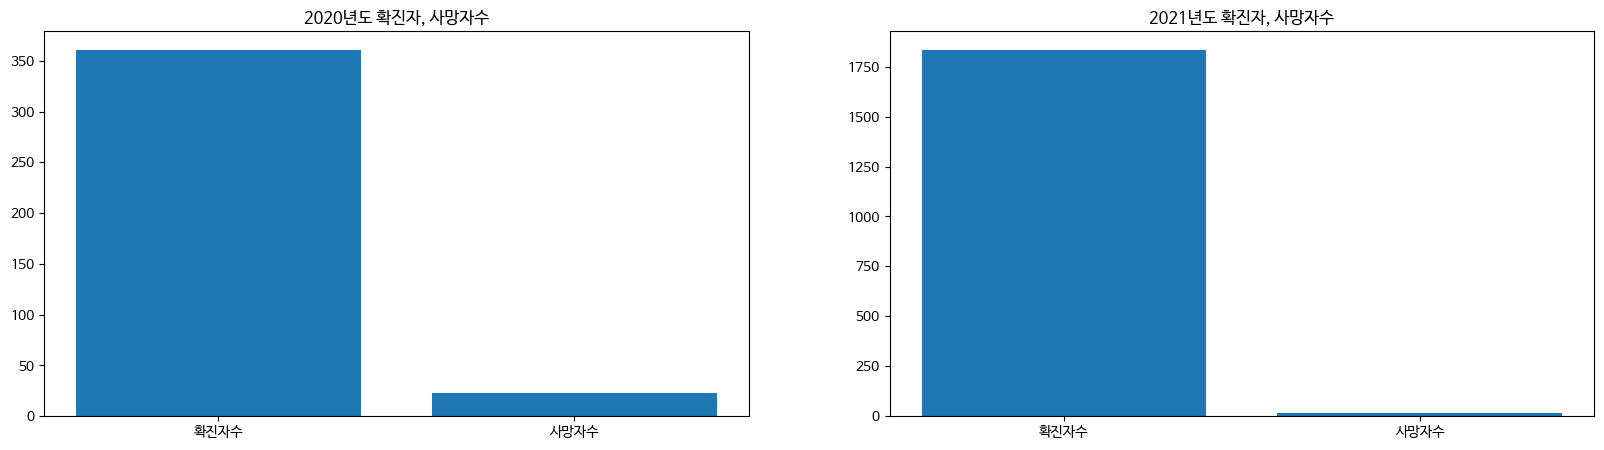

In [14]:
# 차트 작업
plt.figure(figsize=(20,5))  # 가로세로 크기 지정
plt.subplot(121)  # 1행에 2개의 열 중 첫번째 자료
plt.title('2020년도 확진자, 사망자수')
plt.bar(header[4:6], 세로합_2020년도)

plt.subplot(122)  # 1행에 2개의 열 중 두번째 자료
plt.title('2021년도 확진자, 사망자수')
plt.bar(header[4:6], 세로합_2021년도)
plt.show()

In [24]:
label_2020 = []
label_2021 = []

for val in label:
    if val[:4] == '2020':
        label_2020.append(val)
    elif val[:4] == '2021':
        label_2021.append(val)

[8, 9, 1, 2, 18, 20, 2, 9, 292]
['2020-02', '2020-03', '2020-04', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12']


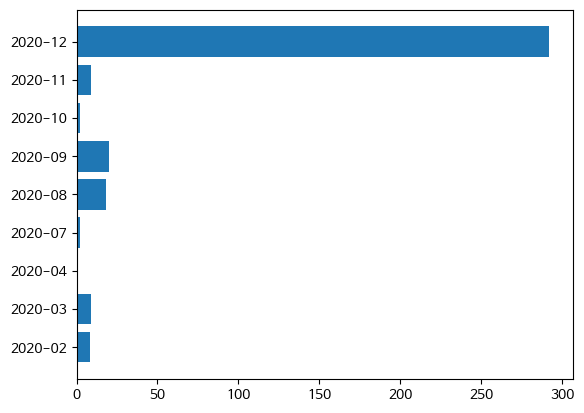

In [25]:
# 2020년도 확진자 수만 분리
data_2020 = []
for x in num_2020:
    data_2020.append(x[0])
print(data_2020)
print(label_2020)

plt.barh(label_2020, data_2020)
plt.show()

[28, 11, 18, 259, 255, 58, 121, 292, 316, 87, 91, 299]
['2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12']


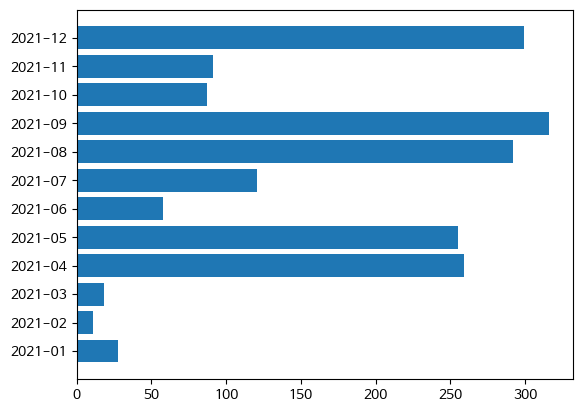

In [27]:
# 2021년도 확진자 수만 분리
data_2021 = []
for x in num_2021:
    data_2021.append(x[0])
print(data_2021)
print(label_2021)

plt.barh(label_2021, data_2021)
plt.show()

### 나눔 글꼴 사용하기

1. https://hangeul.naver.com/font 에서 나눔글꼴 다운  
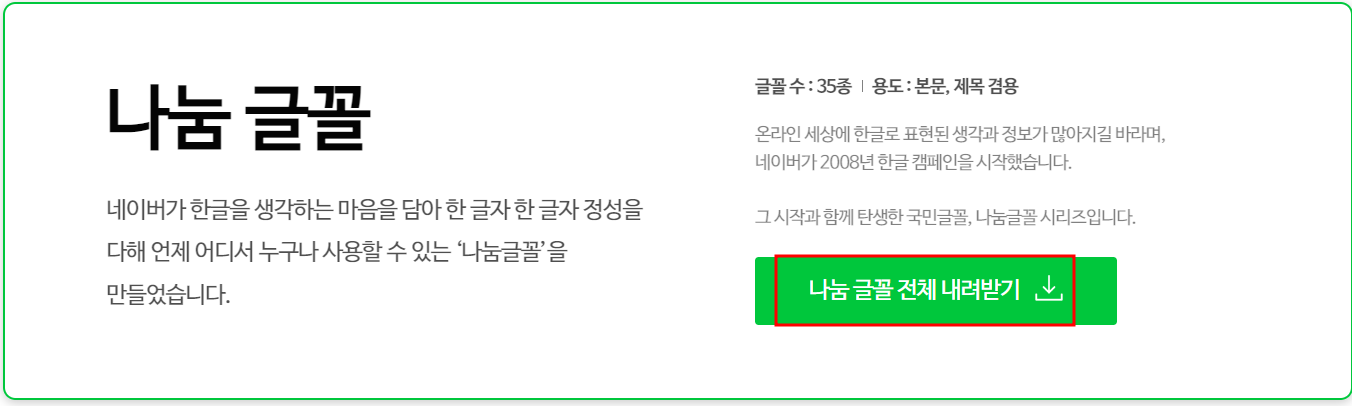  

<br>

2. 사용할 나눔 글꼴 선택  
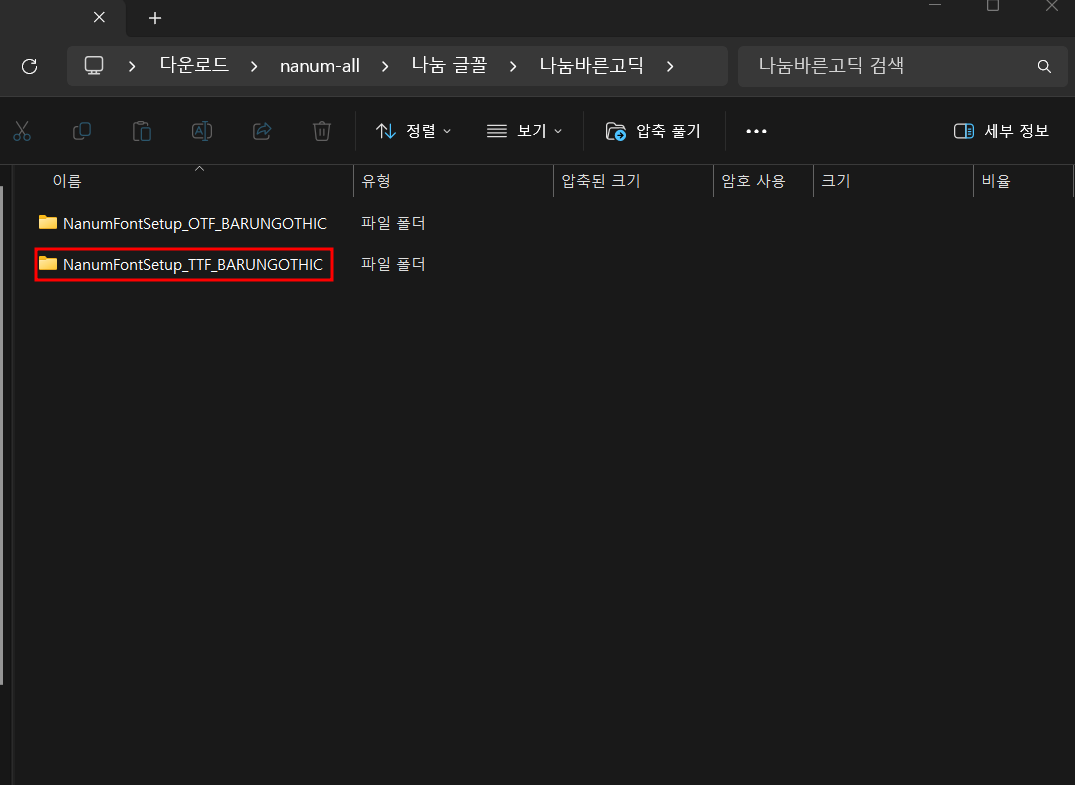  
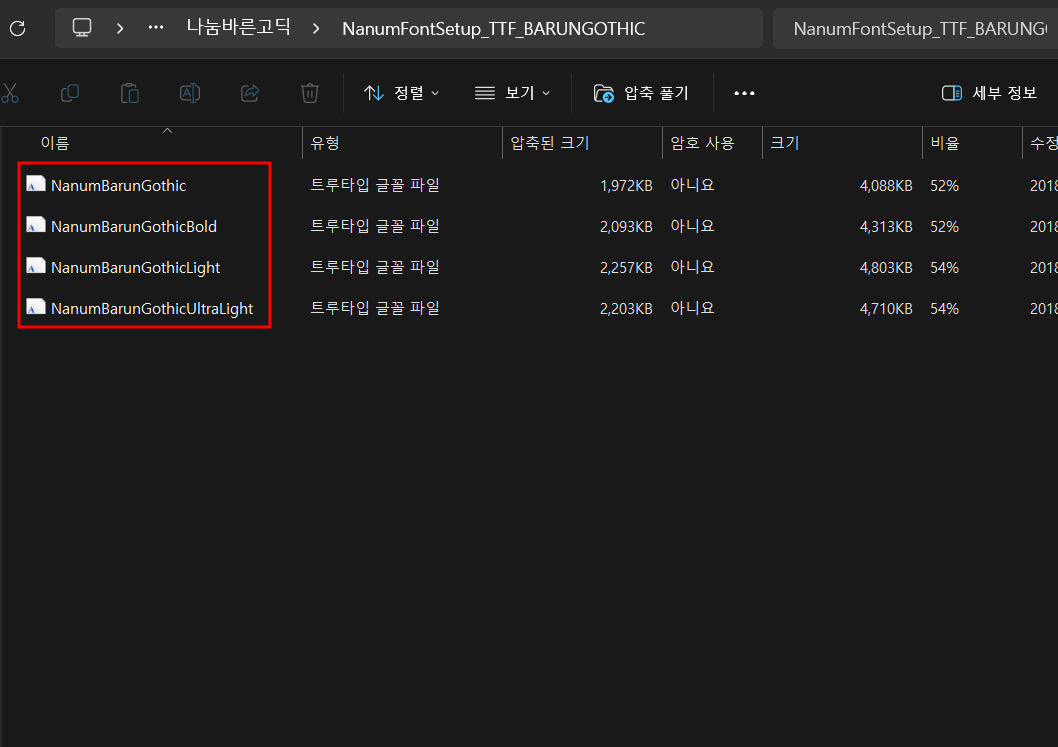  



3. 폰트 디렉터리 찾기


In [19]:
import matplotlib
matplotlib.matplotlib_fname()

'c:\\Users\\bluecom014\\miniconda3\\envs\\sesac\\Lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

4. 해당 폴더의 matplotlibrc 파일을 열기  

5. font.family를 찾아 사용할 글꼴로 변경 후 저장  
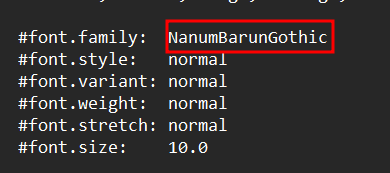  

5. 사용할 글꼴의 ttf 파일을 mpl-data에 fonts/ttf 폴더에 넣는다.  
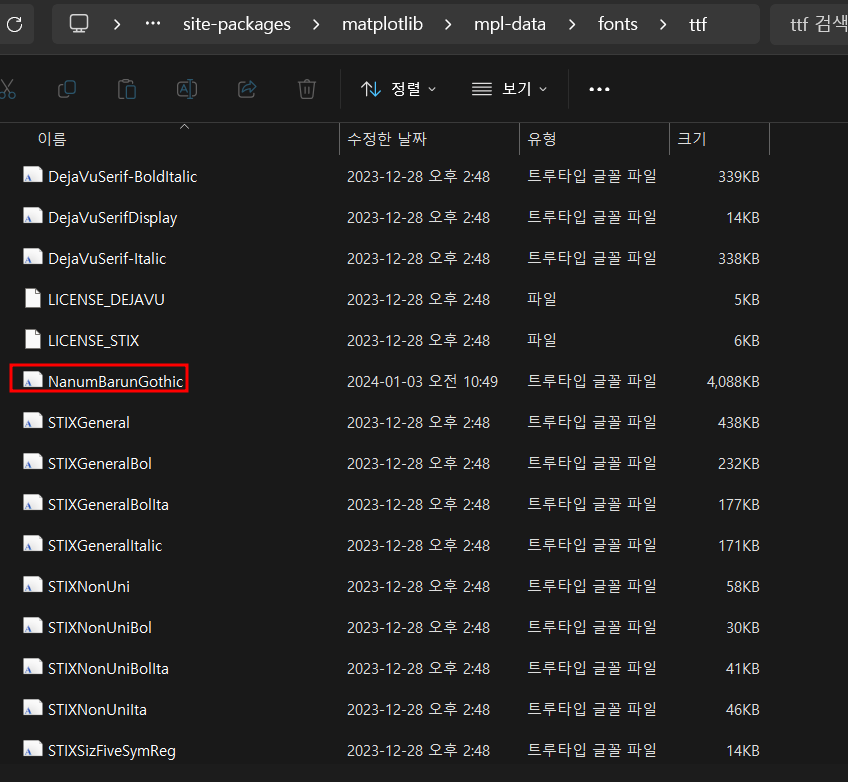  


7. 캐쉬 폴더를 가서 캐쉬를 지운다.

In [20]:
import matplotlib
matplotlib.get_cachedir()

'C:\\Users\\bluecom014\\.matplotlib'

8. 주피터 노트북 재시작 후 다시 실행